What features influence an anime to have a higher value than others?


In [ ]:
#Imports
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load dataset
df_anime = pd.read_csv("/content/drive/MyDrive/DATASETS/ANIME RECOMENDATION/anime.csv")

In [ ]:
#View the dataset
df_anime

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,Unknown,Unknown,Unknown,Novel,Unknown,Unknown,Unknown,13116,354,6,0,0,0,0,354,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,Kadokawa,Unknown,Passione,Manga,Unknown,Unknown,Unknown,17562,7010,70,14,0,14,0,6982,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,Unknown,Unknown,Unknown,Visual novel,Unknown,R - 17+ (violence & profanity),Unknown,17558,11309,48,3,0,0,0,11306,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,Kadokawa,Unknown,8bit,Manga,Unknown,PG-13 - Teens 13 or older,Unknown,17565,1386,2,13,2,2,1,1368,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [ ]:
df_anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [ ]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

# DATA CLEANING

New columns will be created

AIRED -> START YEAR

PREMIERED -> ONLY SEASON

DURATION -> DURATION IN MINUTES

##AIRED

I will create the column called "Start year", where will be the year where the anime was released

In [ ]:
df_anime['Start year'] = df_anime['Aired'].apply(lambda x : x.split('to')[0]).apply(
                          lambda x : x.split(',')).apply(
                          lambda x : x[1] if len(x) > 1 else x[0] ).apply(
                          lambda x : x.replace(' ', ''))

## PREMIERED

I will create the column called "Anime season", where are the variables: fall, winter, spring, summer. What is the time when the new anime come out

In [ ]:
df_anime['Anime season'] = df_anime['Premiered'].apply(lambda x : x.split(' ')[0])

## DURATION

I will create a column called "Duration in minutes", where are the number of minutes that the anime lasted

In [ ]:
df_anime['Duration in minutes'] = df_anime['Duration'].apply(lambda x : x.split(' ')).apply(lambda x : x[0] if len(x) <= 1 else
        (x[0] if x[1] == 'min.' else
        (int(x[0]) / 60 if x[1] == 'sec.' else
        (int(x[0]) * 60 if x[1] == 'hr.' and len(x) < 3 else
        (int(x[0]) * 60 + int(x[2]) if x[1] == 'hr.' and x[2] != 'per' else
         int(x[0]) * 60  )))))

#DATA TRANSFORMATION

In [ ]:
#We will eliminate the columns that will not serve us for this exploratory analysis
df_anime.drop(['MAL_ID','Name' , 'English name' , 'Japanese name' , 'Aired', 'Members','Premiered', 'Favorites',
               'Duration','Watching', 'Completed', 'On-Hold', 'Dropped', 'Ranked', 'Popularity',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'] , axis = 1 , inplace = True)

In [ ]:
#We will eliminate the rows that have a score as "Unknown" because they may be animes that have just been released or because it was not valued
index_name_eliminate = df_anime[df_anime['Score'] == 'Unknown'].index

df_anime.drop(index_name_eliminate , inplace = True)

In [ ]:
#Replace the Unknown variable (which was not a null but an object) to Null
df_anime['Start year'] = df_anime['Start year'].replace('Unknown' , '999999999') #99999999999 to know that it is a null value
df_anime['Duration in minutes'] = df_anime['Duration in minutes'].replace('Unknown' , np.nan)
df_anime['Anime season'] = df_anime['Anime season'].replace('Unknown' , pd.NA)
df_anime['Type'] = df_anime['Type'].replace('Unknown' , pd.NA)
df_anime['Episodes'] = df_anime['Episodes'].replace('Unknown' , '999999999') #99999999999 to know that it is a null value
df_anime['Source'] = df_anime['Source'].replace('Unknown' , pd.NA)
df_anime['Rating'] = df_anime['Rating'].replace('Unknown' , pd.NA)


In [ ]:
#The data type where it should be int or float is object , so we change it to int or float , respectively.
df_anime.Score = df_anime.Score.astype('float')
df_anime['Duration in minutes'] = df_anime['Duration in minutes'].astype('float')
df_anime['Episodes'] = df_anime['Episodes'].astype('int')

In [ ]:
#Replace values 99999999999 with pd.NA
df_anime['Start year'] = df_anime['Start year'].replace('999999999' , pd.NA)
df_anime['Episodes'] = df_anime['Episodes'].replace(999999999 , pd.NA)

# ONE-DIMENSIONAL ANALYSIS

In [ ]:
df_anime.head()

,Score,Genres,Type,Episodes,Producers,Licensors,Studios,Source,Rating,Start year,Anime season,Duration in minutes
0,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26.0,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,R - 17+ (violence & profanity),1998,Spring,24.0
1,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1.0,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,R - 17+ (violence & profanity),2001,<NA>,115.0
2,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26.0,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,PG-13 - Teens 13 or older,1998,Spring,24.0
3,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26.0,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,PG-13 - Teens 13 or older,2002,Summer,25.0
4,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52.0,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,PG - Children,2004,Fall,23.0


In [ ]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12421 entries, 0 to 17552
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Score                12421 non-null  float64
 1   Genres               12421 non-null  object 
 2   Type                 12421 non-null  object 
 3   Episodes             12316 non-null  float64
 4   Producers            12421 non-null  object 
 5   Licensors            12421 non-null  object 
 6   Studios              12421 non-null  object 
 7   Source               10443 non-null  object 
 8   Rating               12310 non-null  object 
 9   Start year           12414 non-null  object 
 10  Anime season         3813 non-null   object 
 11  Duration in minutes  12398 non-null  float64
dtypes: float64(3), object(9)
memory usage: 1.2+ MB


In [ ]:
df_anime.describe()

,Score,Episodes,Duration in minutes
count,12421.000000,12316.000000,12398.000000
mean,6.509999,11.329165,26.572381
std,0.886717,42.797634,25.358223
min,1.850000,1.000000,0.050000
25%,5.930000,1.000000,9.000000
50%,6.520000,2.000000,24.000000
75%,7.140000,12.000000,29.000000
max,9.190000,1818.000000,163.000000


In [ ]:
df_anime.columns

Index(['Score', 'Genres', 'Type', 'Episodes', 'Producers', 'Licensors',
       'Studios', 'Source', 'Rating', 'Start year', 'Anime season',
       'Duration in minutes'],
      dtype='object')

Numerical variables: 'Score' , 'Episodes', 'Duration in minutes'

Categorical variables: 'Genres' , 'Type' , 'Producers' , 'Licensors' , 'Studios' , 'Source' , 'Rating' , 'Start year' , 'Anime season'.

##NUMERICS

###SCORE

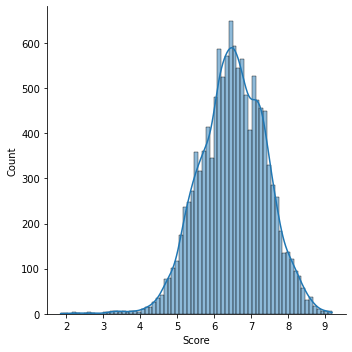

In [ ]:
#View data distribution
sns.displot(data = df_anime , x = 'Score' , kde = True)

Most of the animes are rated between 5 to 8

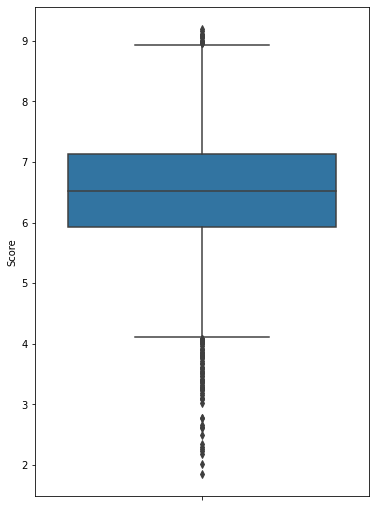

In [ ]:
plt.figure(figsize=(6,9))
sns.boxplot(data = df_anime , y = 'Score')

The score has outliers, either maximum or minimum values. I can affirm that more than 50% of my data has a score of more than 6.

###Episodes

In [ ]:
df_anime.Episodes.describe()

count    12316.000000
mean        11.329165
std         42.797634
min          1.000000
25%          1.000000
50%          2.000000
75%         12.000000
max       1818.000000
Name: Episodes, dtype: float64

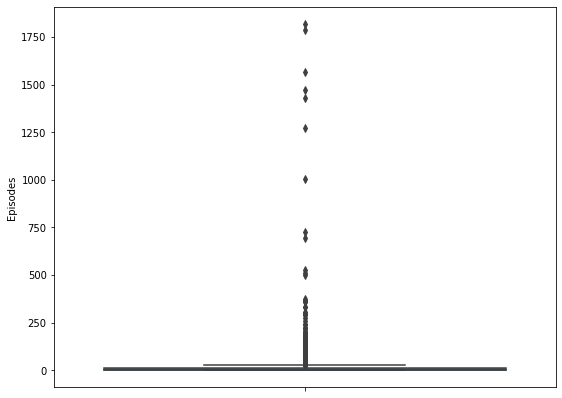

In [ ]:
plt.figure(figsize=(9,7))
sns.boxplot(data = df_anime , y = 'Episodes'  )

75% of my data only comes in 12 or more chapters. This is usually the standard number of chapters an anime has.

### Duration in minutes

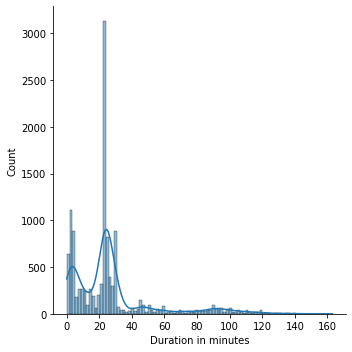

In [ ]:
#View data distribution
sns.displot(data = df_anime , x = 'Duration in minutes' , kde = True)

The distribution tells us that most of our data is between 20 and 40 minutes.

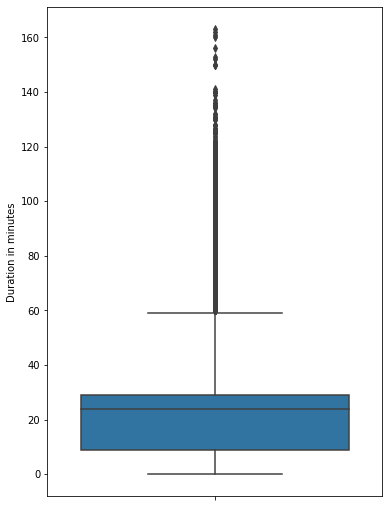

In [ ]:
plt.figure(figsize=(6,9))
sns.boxplot(data = df_anime , y = 'Duration in minutes')

There are outliers . There are anime that have 60 to more minutes . These can be anime movies. While 50% of my data is about 23 minutes (which is ideal) in an anime series, there are outliers.

## CATEGORIES

In [ ]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

### Genres

Here we separate the genres to have a better analysis of them. Since they were in a list

In [ ]:
df_anime['Genres_Split'] = df_anime['Genres'].apply(lambda x : x.replace(' ' , ''))
df_anime['Genres_Split'] = df_anime['Genres_Split'].apply(lambda x : x.split(','))

In [ ]:
gs_top10 = to_1D(df_anime['Genres_Split']).value_counts().head(10).index
ngs_top10  = to_1D(df_anime['Genres_Split']).value_counts().head(10)

In [ ]:
#TOP 10 NUMBER OF ANIME BY GENRE
ngs_top10

Comedy         4559
Action         3312
Fantasy        2452
Adventure      2288
Sci-Fi         2185
Drama          2051
Shounen        1796
Romance        1724
School         1433
SliceofLife    1370
dtype: int64

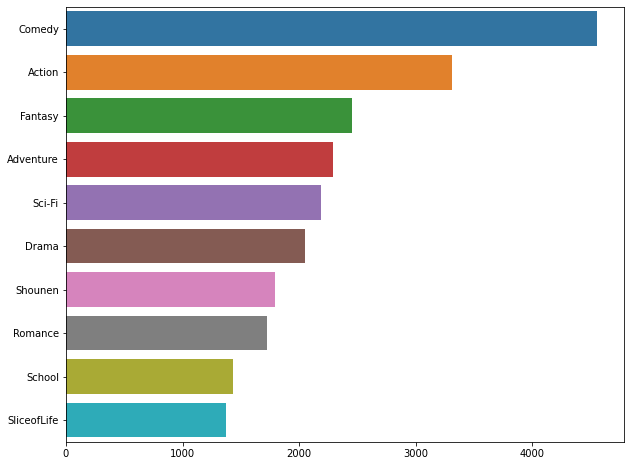

In [ ]:
#TOP 10 OF SEPARATE GENRES

plt.figure(figsize=(10,8))

sns.barplot(y = gs_top10 , x = ngs_top10 )

In the dataset there are more comedy genres

### Type

In [ ]:
df_anime['Type'].value_counts()

TV         3837
OVA        2999
Movie      2017
Special    1754
ONA        1084
Music       730
Name: Type, dtype: int64

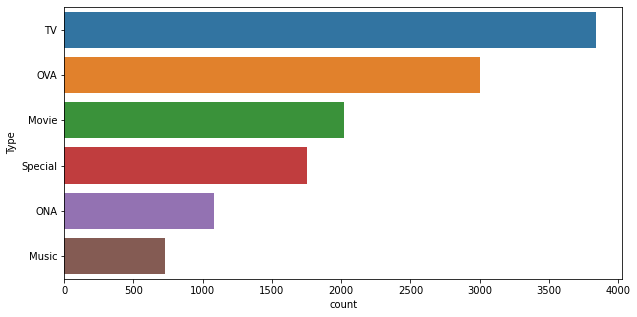

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_anime , y = 'Type' , order = df_anime['Type'].value_counts().index)

There are more TV type anime in the dataset

### Producers

In [ ]:
#As with the genres column, the same is done in this producers column.
df_anime['Producers_Split'] = df_anime['Producers'].apply(lambda x : x.replace(' ' , ''))
df_anime['Producers_Split']= df_anime['Producers_Split'].apply(lambda x : x.split(','))

In [ ]:
#The [1 : 11] , is because there are nulls that are categorized as Unknown.
producer_top10 = to_1D(df_anime['Producers_Split']).value_counts()[1:11].index
nproducer_top10  = to_1D(df_anime['Producers_Split']).value_counts()[1:11]

In [ ]:
#TOP 10 PRODUCERS WHO HAVE MADE THE MOST ANIMES
nproducer_top10

Aniplex         476
Lantis          436
TVTokyo         436
BandaiVisual    393
Movic           323
Sotsu           288
PonyCanyon      288
AT-X            285
Dentsu          281
FujiTV          266
dtype: int64

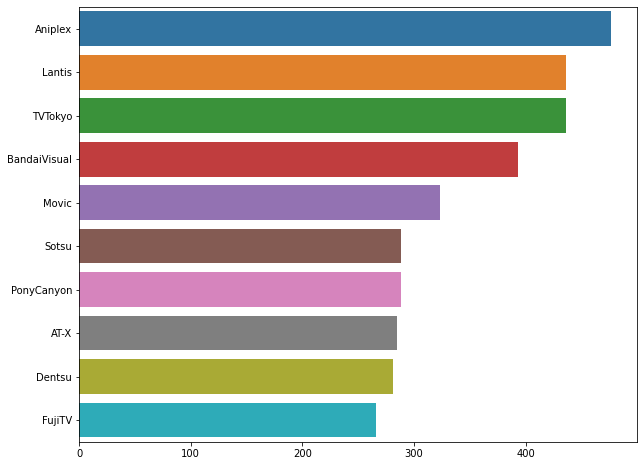

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(y = producer_top10 , x = nproducer_top10 )

Aniplex has produced the most anime according to the dataset.

### LICENSORS

In [ ]:
#As in the genres and producers columns, the separation of the following is carried out
df_anime['Licensors_Split'] = df_anime['Licensors'].apply(lambda x : x.replace(' ' , ''))
df_anime['Licensors_Split']= df_anime['Licensors_Split'].apply(lambda x : x.split(','))

In [ ]:
#The [1 : 11] , is because there are nulls that are categorized as Unknown.
licensors_top10 = to_1D(df_anime['Licensors_Split']).value_counts()[1:11].index
nlicensors_top10  = to_1D(df_anime['Licensors_Split']).value_counts()[1:11]

In [ ]:
#TOP 10 of the licensors who have made the most animes
nlicensors_top10

Funimation                1116
SentaiFilmworks            743
DiscotekMedia              360
ADVFilms                   292
MediaBlasters              271
BandaiEntertainment        201
AniplexofAmerica           192
GeneonEntertainmentUSA     174
VIZMedia                   173
NozomiEntertainment        134
dtype: int64

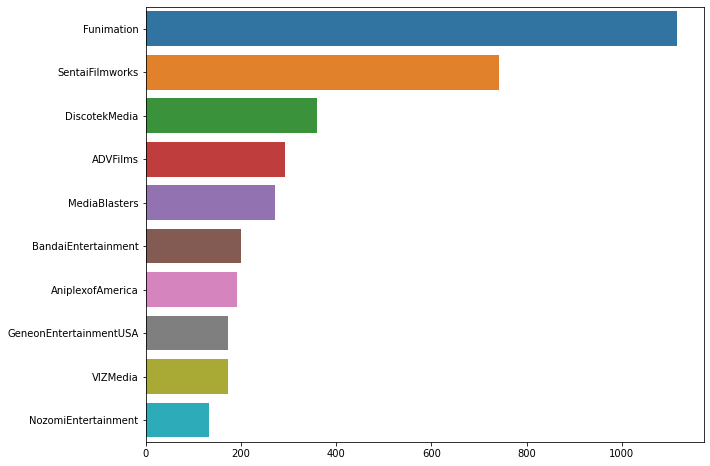

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(y = licensors_top10 , x = nlicensors_top10 )

We can see that funimation has the most licenses in anime.

### Studios

In [ ]:
df_anime['Studios_Split'] = df_anime['Studios'].apply(lambda x : x.replace(' ' , ''))
df_anime['Studios_Split']= df_anime['Studios_Split'].apply(lambda x : x.split(','))

In [ ]:
studios_top10 = to_1D(df_anime['Studios_Split']).value_counts()[1:11].index
nstudios_top10  = to_1D(df_anime['Studios_Split']).value_counts()[1:11]

In [ ]:
nstudios_top10

ToeiAnimation       604
Sunrise             464
Madhouse            355
J.C.Staff           346
ProductionI.G       312
StudioDeen          262
StudioPierrot       232
TMSEntertainment    226
OLM                 207
A-1Pictures         201
dtype: int64

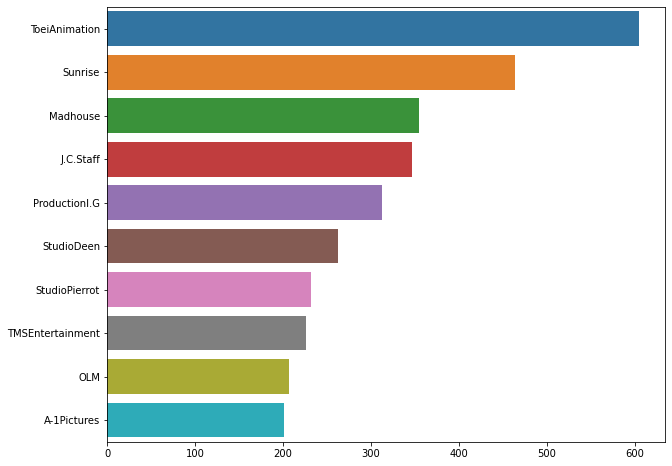

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(y = studios_top10 , x = nstudios_top10 )

ToeAnimation is the studio with the most anime in the world

###Source

In [ ]:
source_top10 = df_anime['Source'].value_counts().head(10).index
nsource_top10 = df_anime['Source'].value_counts().head(10)

In [ ]:
nsource_top10

Manga           3413
Original        3083
Visual novel     976
Game             725
Light novel      709
Novel            401
Other            313
4-koma manga     249
Music            203
Web manga        190
Name: Source, dtype: int64

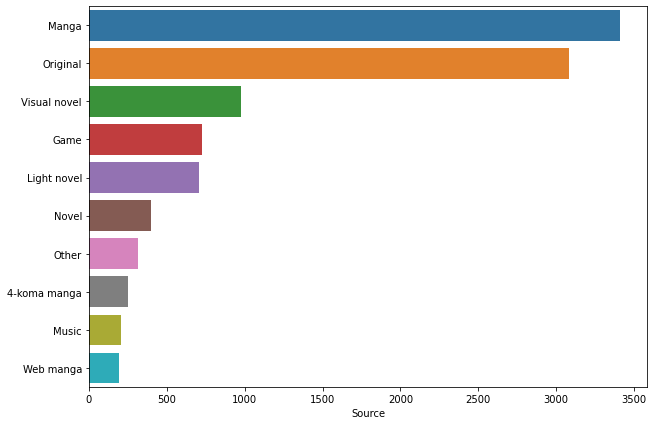

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot( x = nsource_top10 , y= source_top10)

In the dataset there are more anime that come from manga . Then follow the anime that are from original source.

###Rating

In [ ]:
df_anime['Rating'].value_counts()

PG-13 - Teens 13 or older         5456
G - All Ages                      2663
Rx - Hentai                       1328
R - 17+ (violence & profanity)    1080
R+ - Mild Nudity                   917
PG - Children                      866
Name: Rating, dtype: int64

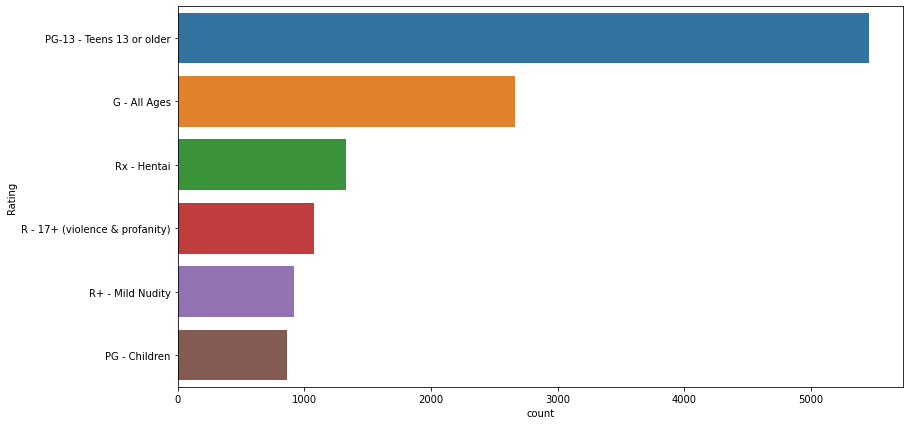

In [ ]:
plt.figure(figsize=(13,7))
sns.countplot(data = df_anime , y = 'Rating' , order = df_anime['Rating'].value_counts().index)

In [ ]:
pip install squarify

In [ ]:
import squarify

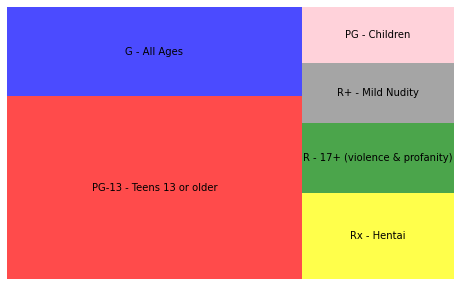

In [ ]:
plt.figure(figsize=(8,5))
color = ['red' , 'blue','yellow','green','gray','pink']
squarify.plot(sizes = df_anime['Rating'].value_counts(),  label = df_anime['Rating'].value_counts().index, alpha=0.7 , color = color,
              text_kwargs={'fontsize':10})
plt.axis('off')
plt.show()

Most anime are for people 13 and older.

### Start year

In [ ]:
df_anime['Start year'].unique()

array(['1998', '2001', '2002', '2004', '2005', '1999', '2003', '1995',
       '1997', '1996', '1988', '1993', '2000', '1979', '1989', '1991',
       '1985', '1986', '1994', '1992', '1990', '1978', '1973', '2006',
       '1987', '1984', '1982', '1977', '1983', '1980', '1976', '1968',
       '1981', '2007', '1971', '1967', '1975', '1962', '1969', '1965',
       '1974', '1964', '2008', '1972', '1970', '1966', '1963', '1945',
       '2009', '2012', '1933', '1929', '1943', '2010', '1931', '1932',
       '1934', '1936', '1928', '1960', '1958', '2011', '1959', '1930',
       '1947', '1917', '1935', '1938', '1939', '1941', '1942', '1948',
       '1950', '1957', '1961', '1918', '1924', '1926', '1927', '1940',
       '1944', '1946', '1952', '1954', '1956', '2016', '2013', '2019',
       '2014', '2015', '2017', '2018', '1925', '1949', '1937', <NA>,
       '2021', '2020'], dtype=object)

In [ ]:
syear_top10 = df_anime['Start year'].value_counts().head(10).index

nsyear_top10 = df_anime['Start year'].value_counts().head(10)

In [ ]:
nsyear_top10

2016    683
2017    652
2014    638
2018    638
2015    590
2013    572
2012    567
2019    523
2011    512
2010    455
Name: Start year, dtype: int64

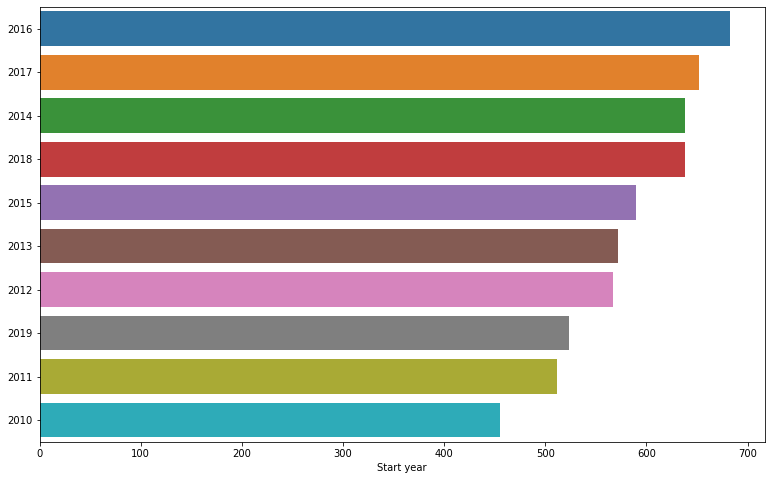

In [ ]:
plt.figure(figsize=(13,8))

sns.barplot(y = syear_top10 , x = nsyear_top10 )

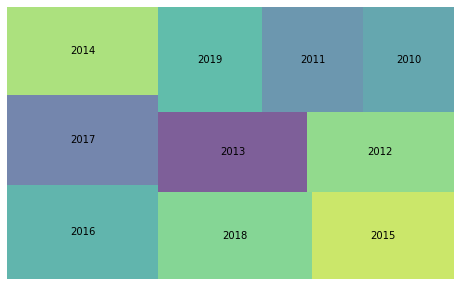

In [ ]:

plt.figure(figsize=(8,5))
squarify.plot(sizes = nsyear_top10,  label = syear_top10, alpha=0.7)
plt.axis('off')
plt.show()

2016 was the year that the most anime were released . This was followed by 2017

### Anime Season

In [ ]:
animeseason = df_anime['Anime season'].value_counts().head(10).index

nanimeseason = df_anime['Anime season'].value_counts().head(10)

In [ ]:
nanimeseason

Spring    1234
Fall      1131
Winter     795
Summer     653
Name: Anime season, dtype: int64

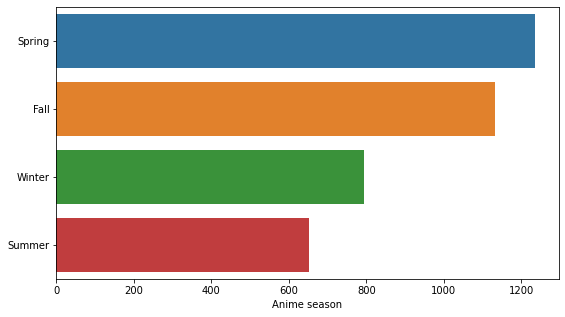

In [ ]:
plt.figure(figsize=(9,5))

sns.barplot(y = animeseason, x = nanimeseason )

#ANALISIS BIDIMENSIONAL

In [ ]:
#Function to extract the data of the other columns with respect to the separated genders.

def get_data(col_index_name , col_target_name): #Col name is the column to which we want to extract the data.

  datos = [] #Store the data
  cont = 0
  index_column = df_anime.columns.get_loc(col_target_name) #To know the index of the desired column

  for list_gen in df_anime[col_index_name]:

    for gen in list_gen:

        val = df_anime.iloc[cont , index_column ] #Find the value of the desired column
        datos.append(val) #Store values from the value to the data list

    cont += 1


  return pd.Series(datos)




## Score v Episodes

A correlation will be made between these values

In [ ]:
df_anime['Episodes'].corr(df_anime['Score'] , method = 'spearman')

0.2968140942785327

It has a moderate positive correlation

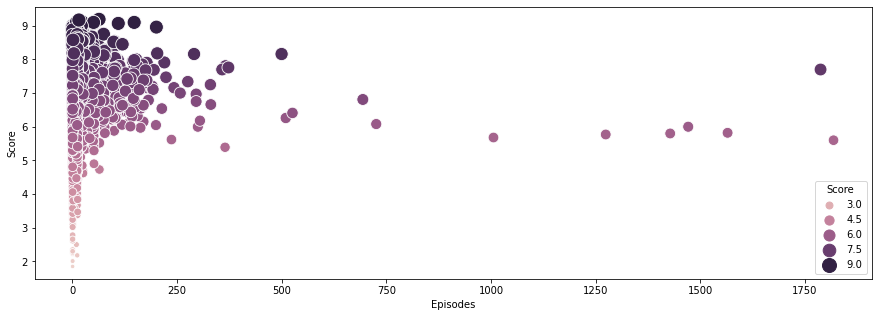

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = df_anime , x = 'Episodes' , y= 'Score' , hue = 'Score' , size = 'Score' , sizes = (20,200))

I can say that as the number of episodes increases, it does not mean that it will have a higher value. So the number of episodes does not influence . It may be that a good anime can have 12 chapters and be very good . Or it does not mean by having many chapters , it will have better valuation .

## Score v Duration in minutes

In [ ]:
df_anime['Score'].corr(df_anime['Duration in minutes'] , method = 'spearman')

0.2971661791245515

It has a moderate positive correlation

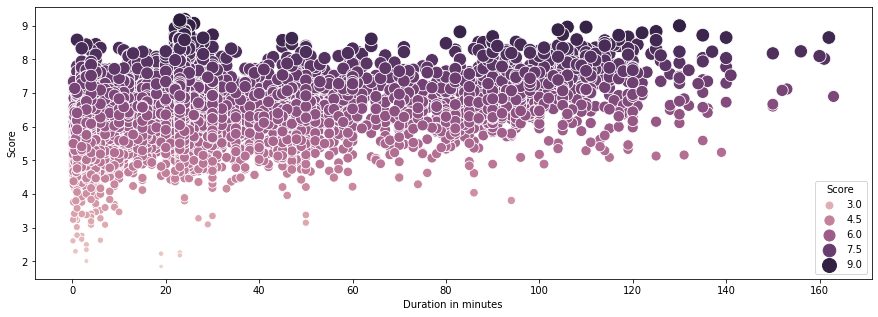

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data = df_anime , x = 'Duration in minutes' , y= 'Score' , hue = 'Score' , size = 'Score' , sizes = (20,200))

As the length of the chapters increases, the rating of the anime increases slightly, as it has a positive upward correlation.

## Genres v Score

**Now we want to see the boxplot with the top 10 genres** that we have previously taken out.

In [ ]:
score_get = get_data('Genres_Split' , 'Score')

In [ ]:
df_anime_aux2 = pd.DataFrame()

In [ ]:
#We create the dataset df_anime_aux2 where the genres will be separated with their score and start year respectively.
df_anime_aux2['Genres'] = to_1D(df_anime['Genres_Split'])
df_anime_aux2['Score'] = score_get
df_anime_aux2.head()

,Genres,Score
0,Action,8.78
1,Adventure,8.78
2,Comedy,8.78
3,Drama,8.78
4,Sci-Fi,8.78


NOW WE WILL LOOK AT THE TOP 10 MOST VALUED GENRES ACCORDING TO THE MEDIAN

In [ ]:
#TOP 10 MOST HIGHLY VALUED GENRES
gen_score__median_top10  = df_anime_aux2.groupby(['Genres'] ,
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False).head(10)

gen_score__median_top10

,Genres,Score
39,Thriller,7.405
21,Mystery,7.210
24,Psychological,7.150
23,Police,7.120
32,Shounen,7.080
14,Josei,7.040
6,Drama,7.020
29,Seinen,7.020
38,Supernatural,6.990
37,SuperPower,6.980


The most valuable genre according to users was Thriller with a median of 7,405 .

**BOXPLOT DE TODOS LOS GÉNEROS EN ORDEN**

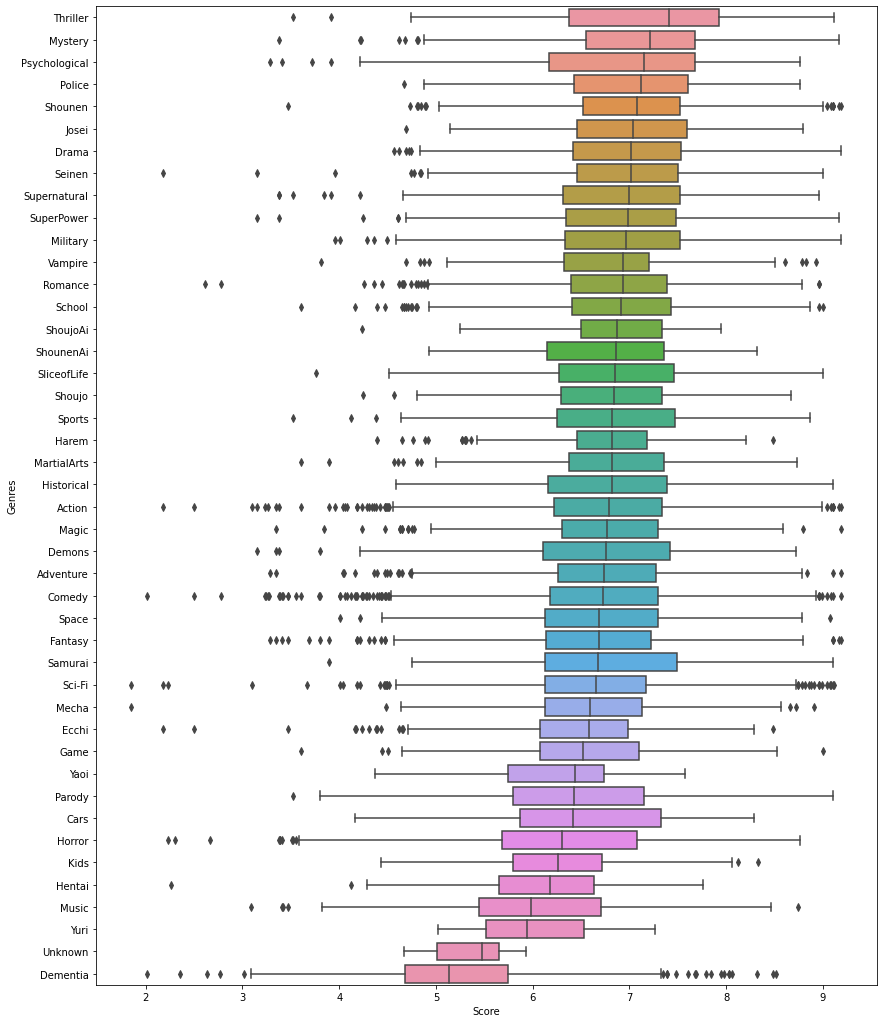

In [ ]:
#View boxplot with these genres
order_graph = df_anime_aux2.groupby(['Genres'] ,
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)
plt.figure(figsize=(14,18))
sns.boxplot(y= 'Genres', x = 'Score' , data= df_anime_aux2 ,
            order = order_graph['Genres'])

We can observe that anime with Thriller genre are the most valued.




**BOX PLOT OF THE TOP 10 GENRES**

In [ ]:
#To filter in pandas the genres column with the top 10 above
fil = df_anime_aux2[df_anime_aux2['Genres'].isin(gen_score__median_top10['Genres'])]
fil

,Genres,Score
3,Drama,8.78
7,Drama,8.39
8,Mystery,8.39
15,Drama,8.24
16,Shounen,8.24
...,...,...
38971,Mystery,4.81
38972,Psychological,4.81
38973,Supernatural,4.81
38974,Thriller,4.81


In [ ]:
fil['Genres'].value_counts()

Drama            2051
Shounen          1796
Supernatural     1300
Seinen            725
Mystery           643
SuperPower        521
Psychological     318
Police            211
Thriller          114
Josei              91
Name: Genres, dtype: int64

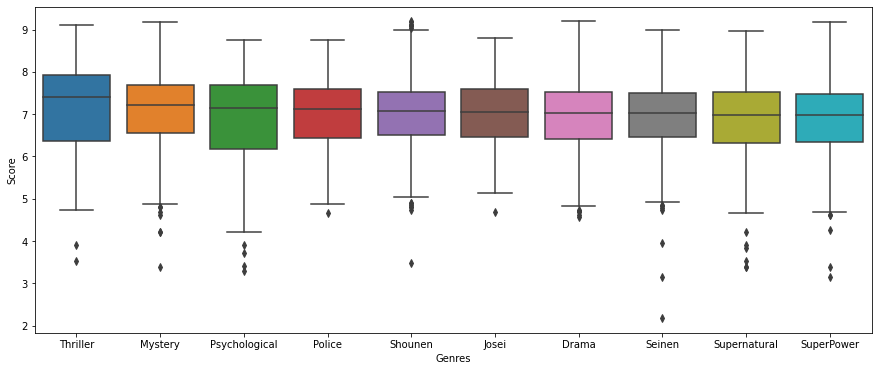

In [ ]:
#View boxplot with these genres
plt.figure(figsize=(15,6))
sns.boxplot(x= 'Genres', y = 'Score' , data= fil , order = gen_score__median_top10['Genres'] )

Here we can see that the Thriler genus is more highly valued than the other genera.

In [ ]:
#FILTER WITH THE TOP10 GENRES
filgenres_top10 = df_anime_aux2[df_anime_aux2['Genres'].isin(gs_top10)]
filgenres_top10

,Genres,Score
0,Action,8.78
1,Adventure,8.78
2,Comedy,8.78
3,Drama,8.78
4,Sci-Fi,8.78
...,...,...
38968,Romance,7.52
38969,SliceofLife,6.83
38970,Comedy,6.83
38975,Shounen,4.81


In [ ]:
gen_score__median_top10  = filgenres_top10.groupby(['Genres'] ,
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)

gen_score__median_top10

,Genres,Score
8,Shounen,7.08
3,Drama,7.02
5,Romance,6.93
6,School,6.91
9,SliceofLife,6.85
0,Action,6.79
1,Adventure,6.74
2,Comedy,6.73
4,Fantasy,6.68
7,Sci-Fi,6.65


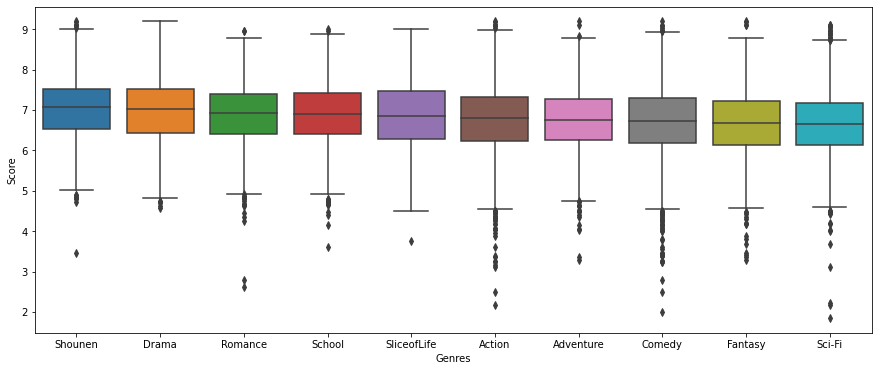

In [ ]:
#BOXPLOT OF TOP10 GENRES
plt.figure(figsize=(15,6))
sns.boxplot(x= 'Genres' , y = 'Score', data = filgenres_top10 , order= gen_score__median_top10['Genres'] )

Shounen

## Type v Score

In [ ]:
#Median score and type
df_anime.groupby(['Type']).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)

,Score
Type,
TV,6.89
Movie,6.55
Special,6.51
OVA,6.32
ONA,6.12
Music,5.75


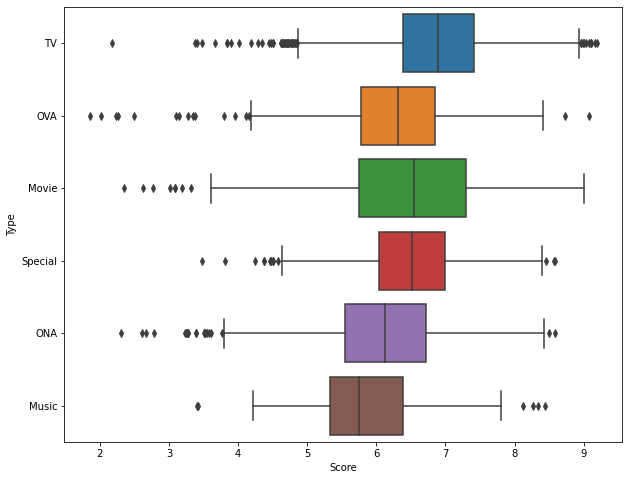

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(y= 'Type', x = 'Score' , data= df_anime ,
            order = df_anime['Type'].value_counts().index)

We can observe that the types of anime focused on TV are the most valued by users.

## Producers v Score

In [ ]:
score_get = get_data('Producers_Split', 'Score')
df_anime_aux3 = pd.DataFrame() #New dataframe

#Set the producers columns with their score
df_anime_aux3['Producers'] = to_1D(df_anime['Producers_Split'])
df_anime_aux3['Score'] = score_get
df_anime_aux3.head()

,Producers,Score
0,BandaiVisual,8.78
1,Sunrise,8.39
2,BandaiVisual,8.39
3,VictorEntertainment,8.24
4,TVTokyo,7.27


In [ ]:
#Which producers have the highest rated anime?
pro_score__median_top10  = df_anime_aux3.groupby(['Producers'] ,
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False).head(10)

pro_score__median_top10

,Producers,Score
630,MiracleRobo,8.960
1208,voqueting,8.685
81,Annapuru,8.670
840,ScienceSARU,8.630
631,Mirai-Kojo,8.600
317,FBC,8.520
108,AudioHighs,8.520
793,RexEntertainment,8.480
266,DearStageinc.,8.465
843,Seikaisha,8.465


The production company with the highest rated anime is MiracleRobo with 8.960

In [ ]:
#To filter in pandas the genres column with the top 10 above
fil2 = df_anime_aux3[df_anime_aux3['Producers'].isin(pro_score__median_top10['Producers'])]
fil2

,Producers,Score
898,RexEntertainment,8.48
1679,AudioHighs,8.96
1680,MiracleRobo,8.96
4529,Annapuru,8.67
4571,AudioHighs,8.08
4572,MiracleRobo,8.08
8908,MiracleRobo,9.08
8981,Seikaisha,8.34
9794,Seikaisha,8.59
12546,ScienceSARU,8.63


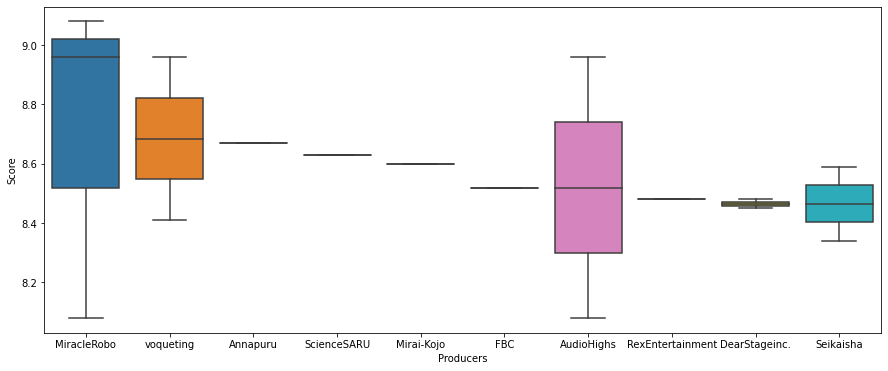

In [ ]:
#View boxplot with these Producers
plt.figure(figsize=(15,6))
sns.boxplot(x= 'Producers', y = 'Score' , data= fil2 , order = pro_score__median_top10['Producers'] )

We can say that having MiracleRobo as a production company would give us an advantage, even though it's very limited since it only has 3 anime made. And the funny thing here too is that Annapuro , ScienceSaur , Mira-Kojo , FBC and RexEntertainment , are in the top 10 because they only have 1 anime created. I can't find a good analysis with this

It was decided to make the valorization with the producers who had the most anime.

In [ ]:
#FILTER WITH THE TOP10 OF PRODUCERS
fil2_top10 = df_anime_aux3[df_anime_aux3['Producers'].isin(producer_top10)]
fil2_top10

,Producers,Score
0,BandaiVisual,8.78
2,BandaiVisual,8.39
4,TVTokyo,7.27
5,BandaiVisual,7.27
6,Dentsu,7.27
...,...,...
22252,Aniplex,5.87
22253,Aniplex,8.18
22255,Lantis,8.18
22273,Aniplex,6.52


In [ ]:
prod_score__median_top10  = fil2_top10.groupby(['Producers'] ,
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)

prod_score__median_top10

,Producers,Score
3,Dentsu,7.470
1,Aniplex,7.410
4,FujiTV,7.280
6,Movic,7.240
2,BandaiVisual,7.070
5,Lantis,7.070
9,TVTokyo,7.050
0,AT-X,7.040
8,Sotsu,7.020
7,PonyCanyon,7.015


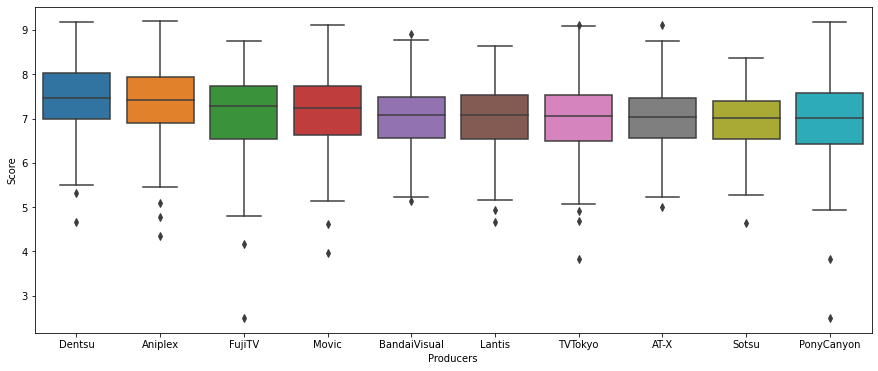

In [ ]:
#BOXPLOT OF TOP10 PRODUCERS
plt.figure(figsize=(15,6))
sns.boxplot(x= 'Producers' , y = 'Score', data = fil2_top10 , order= prod_score__median_top10['Producers'] )

In the top 10, we realize that Dentsu is the highest valued

## Licensors v Score

In [ ]:
score_get = get_data('Licensors_Split', 'Score')
df_anime_aux4 = pd.DataFrame() #New dataframe

#Set the producers columns with their score
df_anime_aux4['Licensors'] = to_1D(df_anime['Licensors_Split'])
df_anime_aux4['Score'] = score_get
df_anime_aux4.head()

,Licensors,Score
0,Funimation,8.78
1,BandaiEntertainment,8.78
2,SonyPicturesEntertainment,8.39
3,Funimation,8.24
4,GeneonEntertainmentUSA,8.24


In [ ]:
#Which licensors have the highest rated anime?
lic_score__median_top10  = df_anime_aux4.groupby(['Licensors'] ,
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False).head(10)

lic_score__median_top10

,Licensors,Score
23,DreamWorks,8.270
76,feel.,8.090
55,PiedPiper,8.090
72,WaltDisneyStudios,8.050
50,Netflix,7.880
36,KadokawaPicturesUSA,7.770
24,ElevenArts,7.695
21,DiCEntertainment,7.690
63,SonyPicturesEntertainment,7.660
33,Inc.,7.630


In [ ]:
#To filter in pandas the licensors column with the top 10 above
fil3 = df_anime_aux4[df_anime_aux4['Licensors'].isin(lic_score__median_top10['Licensors'])]
fil3

,Licensors,Score
2,SonyPicturesEntertainment,8.39
28,Netflix,8.32
82,KadokawaPicturesUSA,7.96
184,SonyPicturesEntertainment,7.66
256,WaltDisneyStudios,8.83
...,...,...
12207,Netflix,6.57
12210,Netflix,8.10
12338,ElevenArts,6.52
12507,Netflix,8.08


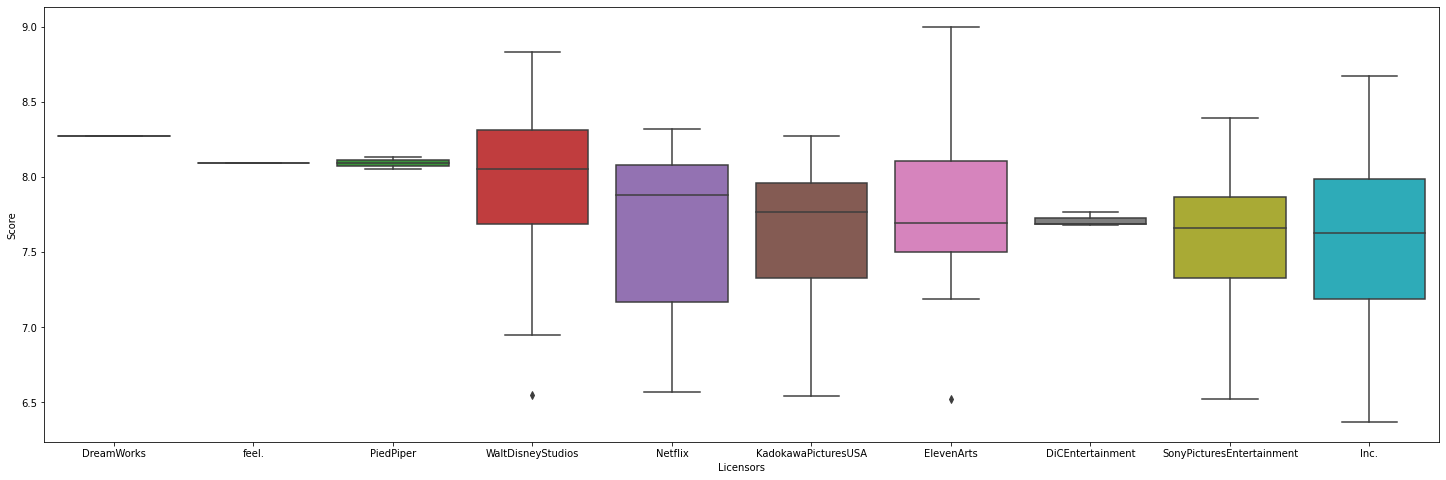

In [ ]:
#View boxplot with these licensors
plt.figure(figsize=(25,8))
sns.boxplot(x= 'Licensors', y = 'Score' , data= fil3 , order = lic_score__median_top10['Licensors'] )

No meaningful analysis can be done with this.

We proceed to draw the valuation top with the top of the quantity that was made in the unidimensional analysis.

In [ ]:
#FILTER WITH LICENSORS TOP10
fil3_top10 = df_anime_aux4[df_anime_aux4['Licensors'].isin(licensors_top10)]
fil3_top10

,Licensors,Score
0,Funimation,8.78
1,BandaiEntertainment,8.78
3,Funimation,8.24
4,GeneonEntertainmentUSA,8.24
5,Funimation,7.27
...,...,...
13152,Funimation,5.51
13162,Funimation,8.60
13165,AniplexofAmerica,7.96
13177,SentaiFilmworks,6.60


In [ ]:
lic_score__median_top10  = fil3_top10.groupby(['Licensors'] ,
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)

lic_score__median_top10

,Licensors,Score
1,AniplexofAmerica,7.565
9,VIZMedia,7.340
4,Funimation,7.240
8,SentaiFilmworks,7.170
2,BandaiEntertainment,7.150
5,GeneonEntertainmentUSA,7.140
7,NozomiEntertainment,7.130
3,DiscotekMedia,7.015
0,ADVFilms,6.695
6,MediaBlasters,6.370


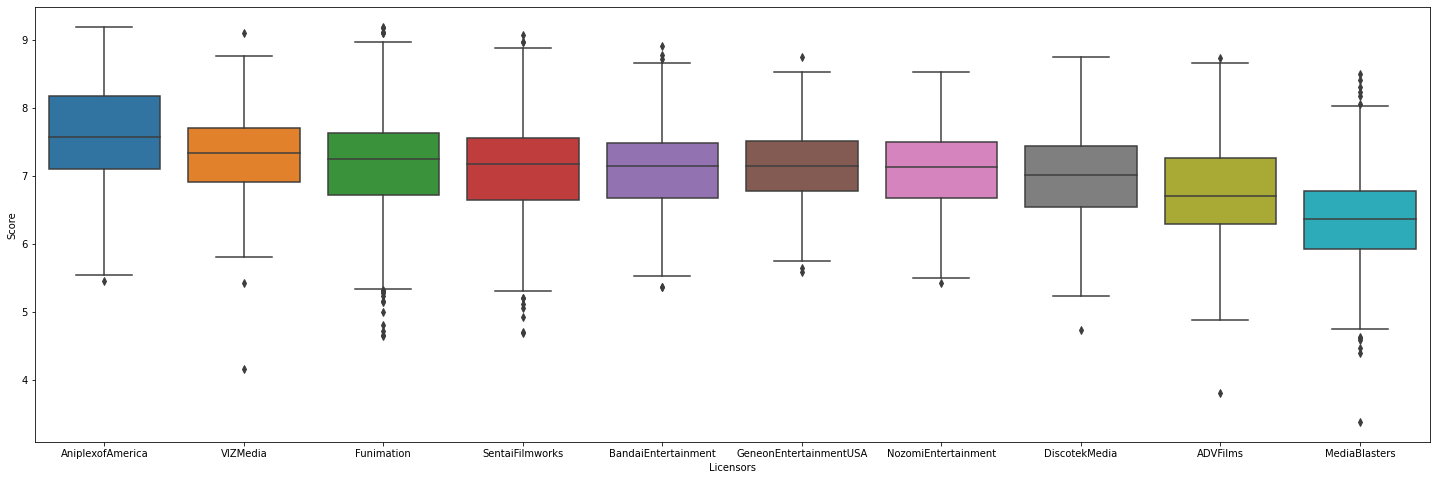

In [ ]:
#BOXPLOT  TOP10 LICENSORS
plt.figure(figsize=(25,8))
sns.boxplot(x= 'Licensors' , y = 'Score', data = fil3_top10 , order= lic_score__median_top10['Licensors'] )

Here we can see that AniplexofAmerica is the highest valued Lincesor.

##Studios v Score

In [ ]:
score_get = get_data('Studios_Split', 'Score')
df_anime_aux5 = pd.DataFrame() #New DataFrame

#Set the producers columns with their score
df_anime_aux5['Studios'] = to_1D(df_anime['Studios_Split'])
df_anime_aux5['Score'] = score_get
df_anime_aux5.head()

,Studios,Score
0,Sunrise,8.78
1,Bones,8.39
2,Madhouse,8.24
3,Sunrise,7.27
4,ToeiAnimation,6.98


In [ ]:
#Which studios have the highest rated anime?
std_score__median_top10  = df_anime_aux5.groupby(['Studios'] ,
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False).head(10)

std_score__median_top10

,Studios,Score
454,StudioBind,8.370
152,EggFirm,8.335
458,StudioChizu,8.330
322,NipponRamayanaFilmCo.,8.040
103,Colored-PencilAnimationDesign,8.030
408,SamsaraAnimationStudio,8.000
428,Shuka,7.925
136,DjinnPower,7.830
440,SquareEnix,7.760
383,PurpleCowStudioJapan,7.720


In [ ]:
#To filter in pandas the licensors column with the top 10 above
fil4 = df_anime_aux5[df_anime_aux5['Studios'].isin(std_score__median_top10['Studios'])]
fil4

,Studios,Score
318,SquareEnix,7.76
1345,SquareEnix,6.37
2871,SquareEnix,7.96
4058,NipponRamayanaFilmCo.,8.04
6606,StudioChizu,8.64
6633,PurpleCowStudioJapan,8.05
6819,PurpleCowStudioJapan,7.39
8128,Shuka,8.03
8578,Shuka,8.01
8579,Shuka,8.10


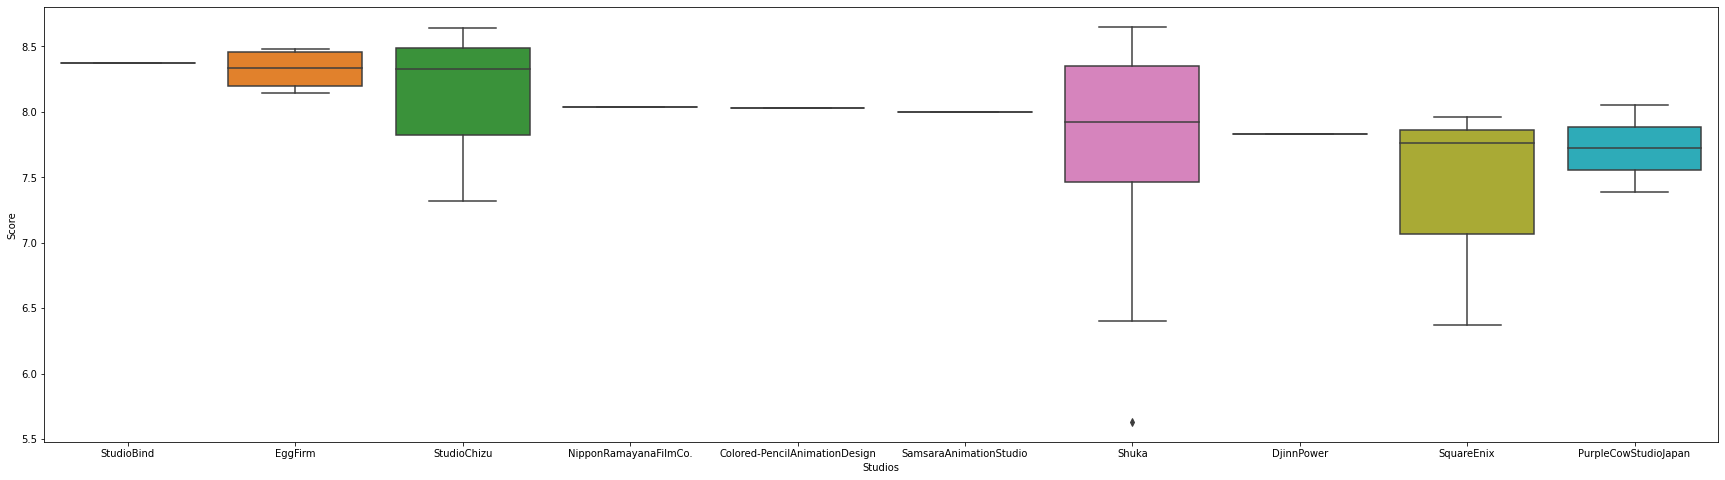

In [ ]:
#View boxplot with these licensors
plt.figure(figsize=(30,8))
sns.boxplot(x = 'Studios', y = 'Score' , data= fil4, order = std_score__median_top10['Studios'] )

This does not allow for a meaningful analysis

We proceed to perform the top of valuation with the top of the number of studies that were made in the unidimensional analysis.

In [ ]:
#FILTER WITH TOP10 STUDIOS
fil4_top10 = df_anime_aux5[df_anime_aux5['Studios'].isin(studios_top10)]
fil4_top10

,Studios,Score
0,Sunrise,8.78
2,Madhouse,8.24
3,Sunrise,7.27
4,ToeiAnimation,6.98
6,J.C.Staff,8.06
...,...,...
12983,Madhouse,6.55
13012,StudioPierrot,7.42
13052,Sunrise,7.01
13095,TMSEntertainment,7.13


In [ ]:
std_score__median_top10  = fil4_top10.groupby(['Studios'] ,
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)

std_score__median_top10

,Studios,Score
0,A-1Pictures,7.210
4,ProductionI.G,7.160
5,StudioDeen,7.130
8,TMSEntertainment,7.075
1,J.C.Staff,6.940
2,Madhouse,6.930
7,Sunrise,6.910
6,StudioPierrot,6.880
9,ToeiAnimation,6.720
3,OLM,6.600


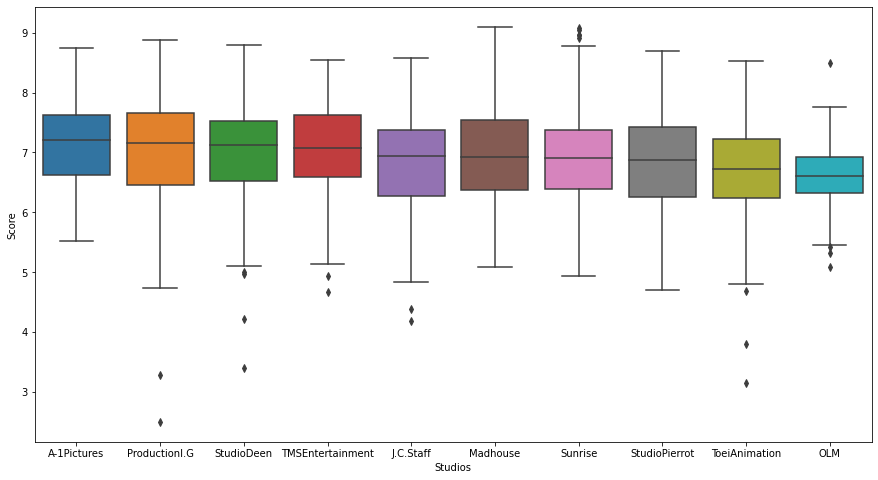

In [ ]:
#BOXPLOT TOP10 STUDIOS
plt.figure(figsize=(15,8))
sns.boxplot(x= 'Studios' , y = 'Score', data = fil4_top10 , order= std_score__median_top10['Studios'] )

It can be seen that A-1 Pictures is the studio with the highest valuation.

## Source v Score

In [ ]:
#TOP 10 OF SOURCES THAT ARE MOST HIGHLY VALUED
source_score__median_top10  = df_anime.groupby(['Source'] ,
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False).head(10)

source_score__median_top10

,Source,Score
5,Light novel,7.110
6,Manga,6.960
14,Web manga,6.850
8,Novel,6.830
0,4-koma manga,6.760
1,Book,6.695
3,Digital manga,6.530
2,Card game,6.495
4,Game,6.450
13,Visual novel,6.440


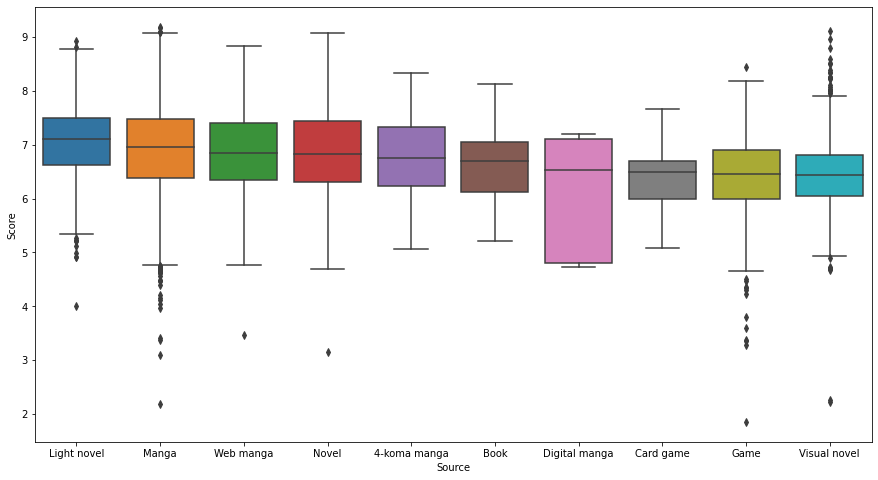

In [ ]:
#BOXPLOT TOP10 SOURCE
plt.figure(figsize=(15,8))
sns.boxplot(x= 'Source' , y = 'Score', data = df_anime , order= source_score__median_top10['Source'] )

Anime that come from a Light Novel are the most highly rated.

In [ ]:
#FILTER WITH THE TOP10 OF SOURCE
filsource_top10 = df_anime[df_anime['Source'].isin(source_top10)]
filsource_top10

,Score,Genres,Type,Episodes,Producers,Licensors,Studios,Source,Rating,Start year,Anime season,Duration in minutes,Genres_Split,Producers_Split,Licensors_Split,Studios_Split
0,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26.0,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,R - 17+ (violence & profanity),1998,Spring,24.0,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",[BandaiVisual],"[Funimation, BandaiEntertainment]",[Sunrise]
1,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1.0,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,R - 17+ (violence & profanity),2001,<NA>,115.0,"[Action, Drama, Mystery, Sci-Fi, Space]","[Sunrise, BandaiVisual]",[SonyPicturesEntertainment],[Bones]
2,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26.0,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,PG-13 - Teens 13 or older,1998,Spring,24.0,"[Action, Sci-Fi, Adventure, Comedy, Drama, Sho...",[VictorEntertainment],"[Funimation, GeneonEntertainmentUSA]",[Madhouse]
3,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26.0,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,PG-13 - Teens 13 or older,2002,Summer,25.0,"[Action, Mystery, Police, Supernatural, Drama,...","[TVTokyo, BandaiVisual, Dentsu, VictorEntertai...","[Funimation, BandaiEntertainment]",[Sunrise]
4,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52.0,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,PG - Children,2004,Fall,23.0,"[Adventure, Fantasy, Shounen, Supernatural]","[TVTokyo, Dentsu]",[Unknown],[ToeiAnimation]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17504,6.59,Comedy,ONA,4.0,Unknown,Unknown,Unknown,Original,PG-13 - Teens 13 or older,2021,<NA>,NaN,[Comedy],[Unknown],[Unknown],[Unknown]
17505,7.52,"Music, Romance",Music,1.0,Unknown,Unknown,"10Gauge, Studio DURIAN",Original,G - All Ages,2021,<NA>,4.0,"[Music, Romance]",[Unknown],[Unknown],"[10Gauge, StudioDURIAN]"
17512,6.83,"Slice of Life, Comedy",Special,1.0,Unknown,Unknown,Unknown,Game,PG - Children,2021,<NA>,10.0,"[SliceofLife, Comedy]",[Unknown],[Unknown],[Unknown]
17513,4.81,"Mystery, Psychological, Supernatural, Thriller...",Special,1.0,Unknown,Unknown,CloverWorks,Manga,R - 17+ (violence & profanity),2021,<NA>,23.0,"[Mystery, Psychological, Supernatural, Thrille...",[Unknown],[Unknown],[CloverWorks]


In [ ]:
source_score__median_top10  = filsource_top10.groupby(['Source'] ,
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False)

source_score__median_top10

,Source,Score
2,Light novel,7.11
3,Manga,6.96
9,Web manga,6.85
5,Novel,6.83
0,4-koma manga,6.76
1,Game,6.45
8,Visual novel,6.44
6,Original,6.29
7,Other,6.12
4,Music,5.66


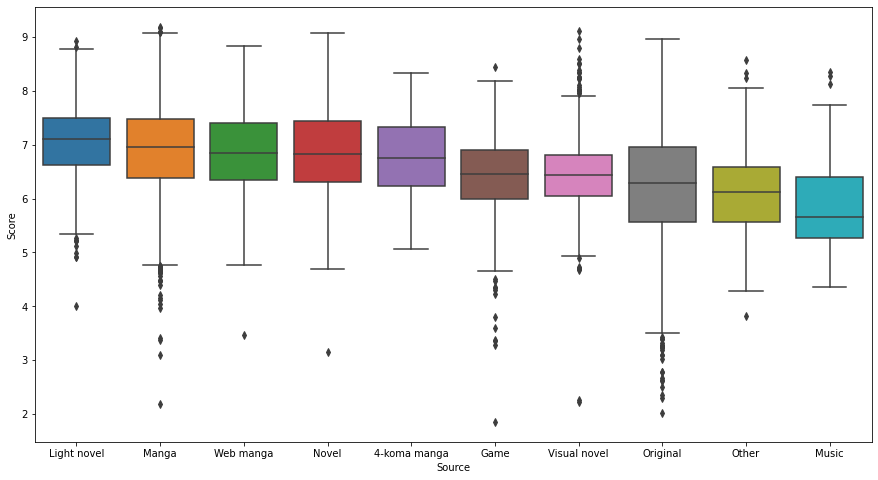

In [ ]:
#BOXPLOT TOP10 SOURCE
plt.figure(figsize=(15,8))
sns.boxplot(x= 'Source' , y = 'Score', data = filsource_top10 , order= source_score__median_top10['Source'] )

##Rating v Score

In [ ]:
#TOP 10 RATINGS THAT ARE MOST HIGHLY RATED
rating_score__median_top10  = df_anime.groupby(['Rating'] ,
                                  as_index=False).agg({'Score' : 'median'}).sort_values('Score' , ascending = False).head(10)

rating_score__median_top10

,Rating,Score
3,R - 17+ (violence & profanity),7.100
2,PG-13 - Teens 13 or older,6.800
1,PG - Children,6.460
4,R+ - Mild Nudity,6.440
5,Rx - Hentai,6.185
0,G - All Ages,6.030


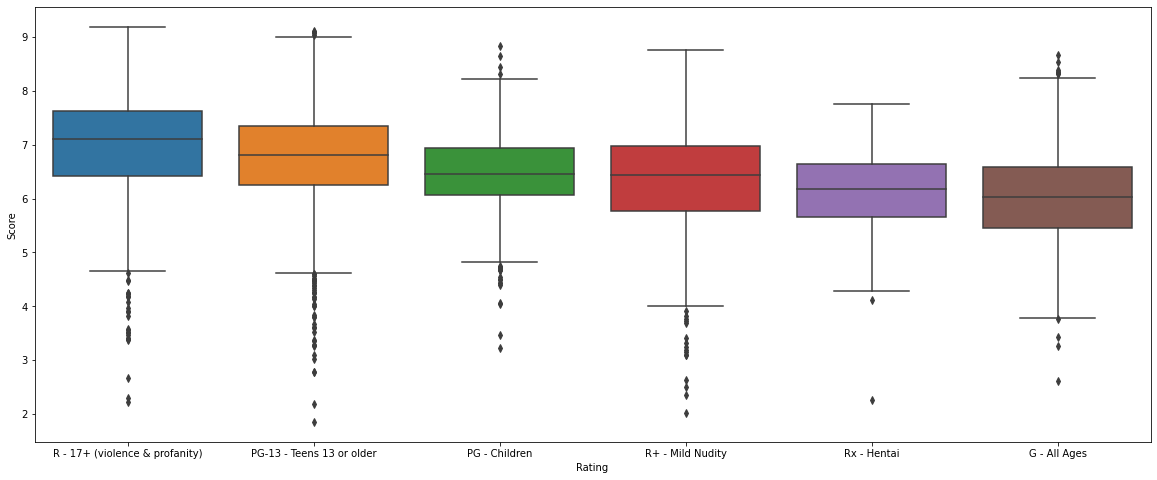

In [ ]:
#BOXPLOT TOP10 RATING
plt.figure(figsize=(20,8))
sns.boxplot(x= 'Rating' , y = 'Score', data = df_anime , order= rating_score__median_top10['Rating'] )

Anime for viewers over 17 years old are the most highly valued